<a href="https://colab.research.google.com/github/DikshaNarang20/jury-/blob/main/Brain_tumor_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
import warnings
warnings.filterwarnings("ignore")
tf.keras.backend.clear_session()

In [59]:
import zipfile
import tempfile
from tensorflow import keras

# Path to your zip file
zip_file_path = "/content/archive (3).zip"

# Create a temporary directory
with tempfile.TemporaryDirectory() as temp_dir:
    try:
        # Extract the contents of the zip file into the temporary directory
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
              for file_info in zip_ref.infolist():
                zip_ref.extract(file_info, temp_dir)




        # Load images from the extracted directory using image_dataset_from_directory
        data = keras.utils.image_dataset_from_directory(temp_dir, batch_size=32, image_size=(256, 256))

        # At this point, 'data' is a TensorFlow dataset containing your images

    except OSError as e:
        print(f"Error extracting zip file: {e}")


Found 253 files belonging to 2 classes.


In [ ]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: /content


In [ ]:
import os
dataset_dir = r'/content/drive/MyDrive/archive (3)'
print("Contents of the directory:", os.listdir(dataset_dir))


Contents of the directory: ['yes', 'brain_tumor_dataset', 'no']


In [60]:
from tensorflow import keras

# Path to your dataset directory
dataset_dir = r"/content/drive/MyDrive/archive (3)"

# Create a TensorFlow dataset from the directory
data = keras.utils.image_dataset_from_directory(
    dataset_dir,
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=42
)




Found 253 files belonging to 2 classes.
Using 203 files for training.


In [61]:
batch = data.as_numpy_iterator().next()

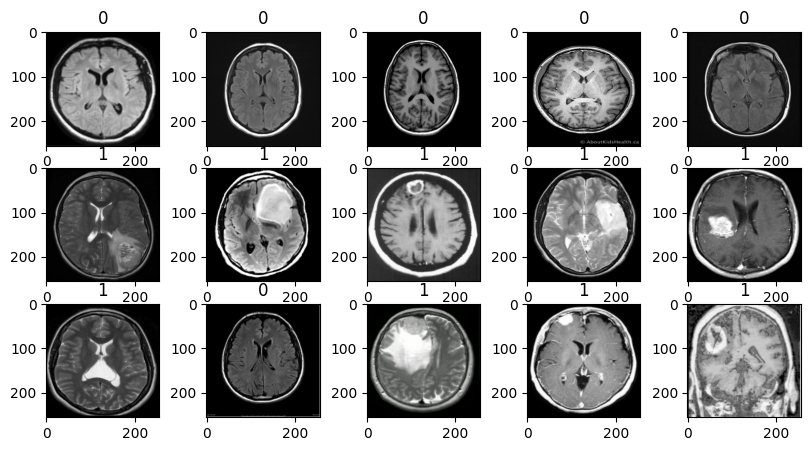

In [62]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5, figsize=(10,5))
ax = ax.flatten()
for idx, img in enumerate(batch[0][:15]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [63]:
data = data.map(lambda x,y: (x/255, y))

In [64]:
batch = data.as_numpy_iterator().next()

In [65]:
print("Minimum value of the scaled data:", batch[0].min())
print("Maximum value of the scaled data:", batch[0].max())

Minimum value of the scaled data: 0.0
Maximum value of the scaled data: 1.0


In [66]:
print("There are", len(data), "batches in our data")

There are 7 batches in our data


In [67]:
train_size = int(len(data)*0.6)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.2)+1

In [68]:
print("Train Size:", train_size)
print("Validation Size:", val_size)
print("Test Size:", test_size)

print("Sum of Train, Validation and Test sizes is equal to:", train_size + val_size + test_size)

Train Size: 4
Validation Size: 2
Test Size: 2
Sum of Train, Validation and Test sizes is equal to: 8


In [70]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [71]:
batch = data.as_numpy_iterator().next()

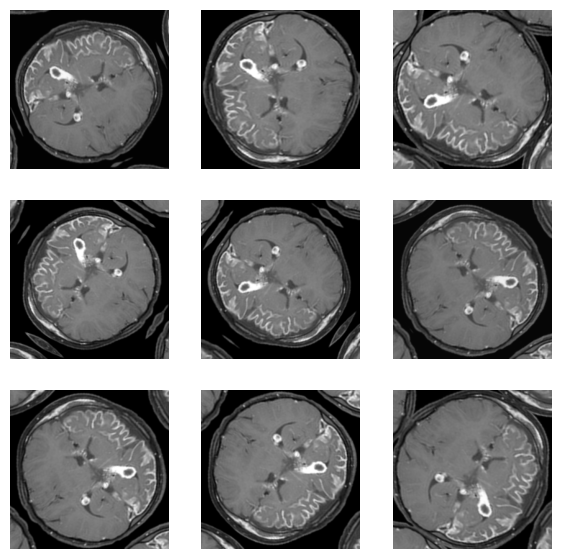

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(256,256,3)),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomRotation(0.2)
])

image = batch[0]


plt.figure(figsize=(7, 7))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
    data_augmentation,
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(32, (5,5), 1, activation="relu", padding="same"),
    Conv2D(32, (5,5), 1, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    Conv2D(16, (3,3), 1, activation="relu", padding="same"),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [75]:
model.compile(optimizer="adam", loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      12832     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      25632     
                                                      

In [77]:
history = model.fit(train, epochs=15, validation_data=val)


Epoch 1/15
4/4 [==============================] - 41s 10s/step - loss: 0.7009 - accuracy: 0.6797 - val_loss: 0.6579 - val_accuracy: 0.7969
Epoch 2/15
4/4 [==============================] - 38s 9s/step - loss: 0.6171 - accuracy: 0.6719 - val_loss: 0.6070 - val_accuracy: 0.6406
Epoch 3/15
4/4 [==============================] - 36s 10s/step - loss: 0.6628 - accuracy: 0.6250 - val_loss: 0.5686 - val_accuracy: 0.7812
Epoch 4/15
4/4 [==============================] - 40s 11s/step - loss: 0.6233 - accuracy: 0.6875 - val_loss: 0.5999 - val_accuracy: 0.7188
Epoch 5/15
4/4 [==============================] - 38s 9s/step - loss: 0.6140 - accuracy: 0.7266 - val_loss: 0.5159 - val_accuracy: 0.8125
Epoch 6/15
4/4 [==============================] - 36s 10s/step - loss: 0.5482 - accuracy: 0.7500 - val_loss: 0.4514 - val_accuracy: 0.8125
Epoch 7/15
4/4 [==============================] - 38s 9s/step - loss: 0.6522 - accuracy: 0.7188 - val_loss: 0.4864 - val_accuracy: 0.7656
Epoch 8/15
4/4 [==============

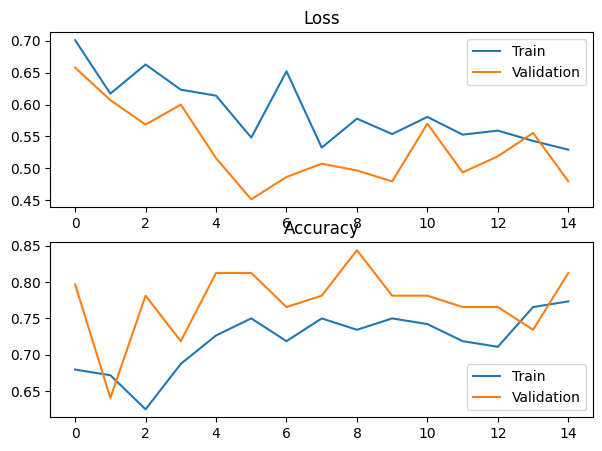

In [78]:
fig, ax = plt.subplots(2, 1, figsize=(7,5))

ax[0].plot(history.history["loss"], label="Train")
ax[0].plot(history.history["val_loss"], label="Validation")
ax[0].title.set_text("Loss")
ax[0].legend()

ax[1].plot(history.history["accuracy"], label="Train")
ax[1].plot(history.history["val_accuracy"], label="Validation")
ax[1].title.set_text("Accuracy")
ax[1].legend()

plt.show()

In [79]:
from tensorflow.keras.metrics import BinaryAccuracy, Recall, Precision
bin_acc = BinaryAccuracy()
recall = Recall()
precision = Precision()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    bin_acc.update_state(y, yhat)
    recall.update_state(y, yhat)
accuracy_percentage = bin_acc.result().numpy() * 100
recall_percentage = recall.result().numpy() * 100
precision_percentage = precision.result().numpy() * 100

print("Accuracy: {:.2f}%\nRecall: {:.2f}%\nPrecision: {:.2f}%".format(accuracy_percentage, recall_percentage, precision_percentage))

1/1 [==============================] - 1s 975ms/step
Accuracy: 90.91%
Recall: 100.00%
Precision: 0.00%


In [83]:
batch = test.as_numpy_iterator().next()

In [84]:
# Check if the batch has enough elements
if len(batch[0]) > 15 and len(batch[1]) > 15:
    img, label = batch[0][15], batch[1][15]
    plt.imshow(img)
    if label == 1:
        plt.title("Brain with Tumor")
    else:
        plt.title("Healthy Brain")
    plt.show()
else:
    print("Batch does not have enough elements for index 15.")


Batch does not have enough elements for index 15.


In [89]:
# Assuming you have a dataset named 'data'
num_batches = len(list(data.as_numpy_iterator()))

print("Number of batches:", num_batches)


Number of batches: 7


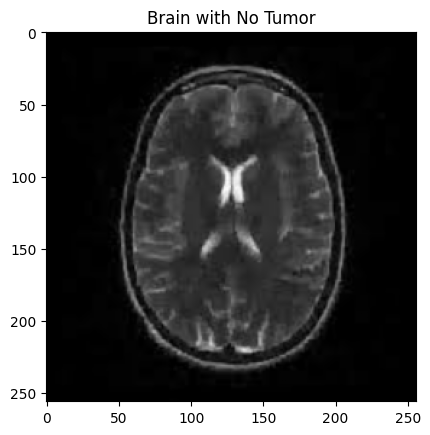

In [99]:
img, label = batch[0][7], batch[1][7]
plt.imshow(img)
if label==1:
    plt.title("Brain with Tumor")
else:
    plt.title("Brain with No Tumor")
plt.show()

In [91]:
y_hat = model.predict(np.expand_dims(img, 0))

1/1 [==============================] - 0s 91ms/step


In [92]:
y_hat

array([[0.26070154]], dtype=float32)

In [93]:
if y_hat < 0.5:
    print("No tumor detected")
else:
    print("Tumor detected")

No tumor detected
